# Immigration ro Canada from 1980 to 2013

Canada Immigration from 1980 - 2013
by Richard Balbuena

In [5]:
# Downloading and Prepping Data Import primary modules.
import numpy as np
import pandas as pd

In [6]:
# Install xlrd module.
!pip install xlrd
print('xlrd installed!!')

  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)
xlrd installed!!


In [7]:
# Load the dataframe 
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [8]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [9]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


Visualizing Data using Matplotlib Import Matplotlib.

In [10]:
%matplotlib

import matplotlib as mpl
import matplotlib.pyplot as plt

# optional: for ggplot-like style
mpl.style.use('ggplot')

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__)

Using matplotlib backend: agg
Matplotlib version:  3.1.3


In [11]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


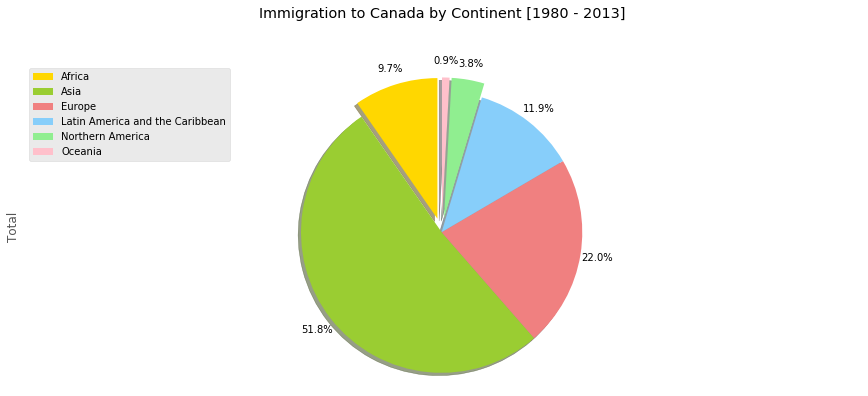

In [12]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

Immigration Trend of top 5 countries to Canada

In [13]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Text(0.5, 0, 'Years')

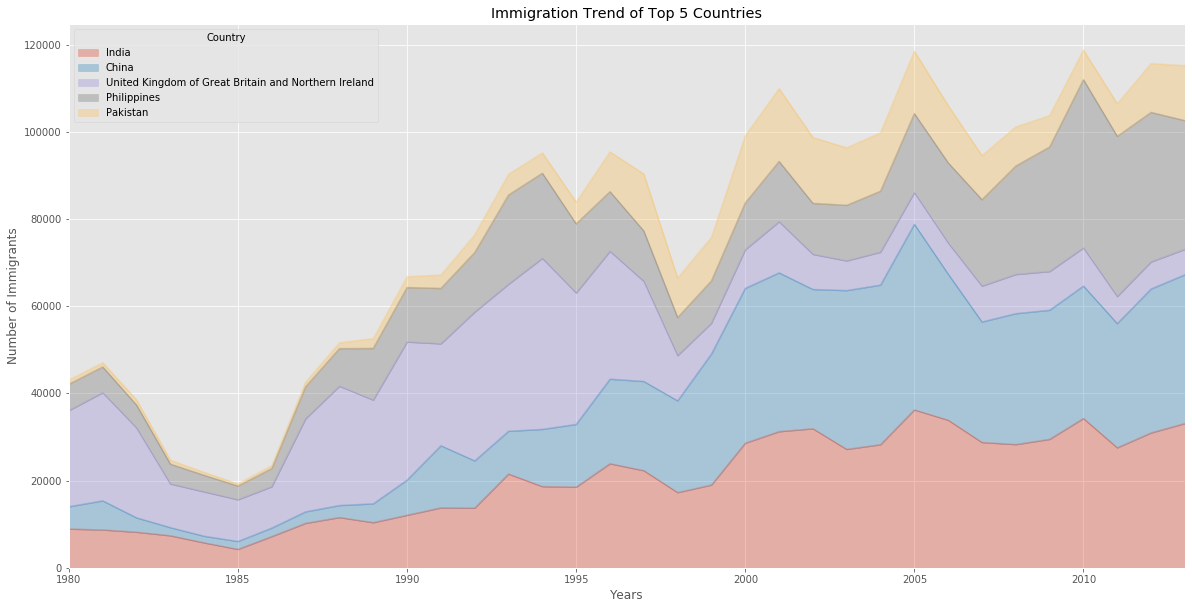

In [14]:
# Plot of top 5 countries

ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

Text(0.5, 0, 'Years')

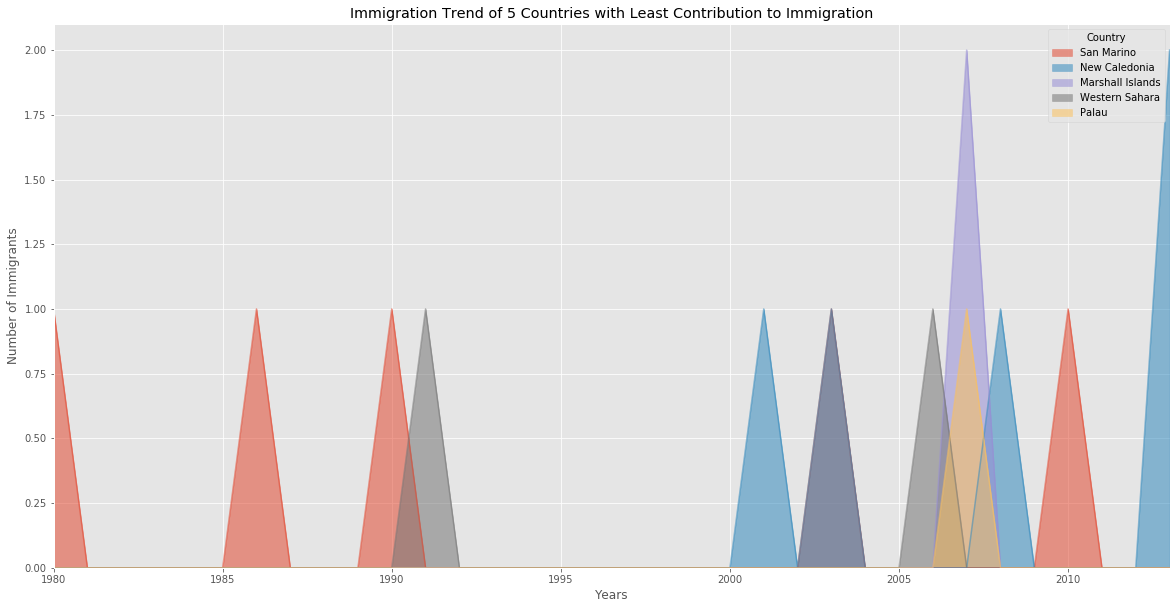

In [15]:
# get the 5 countries with the least contribution
df_least5 = df_can.tail(5)

# transpose the dataframe
df_least5 = df_least5[years].transpose() 
df_least5.head()

# let's change the index values of df_least5 to type integer for plotting
df_least5.index = df_least5.index.map(int)
ax = df_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))

ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

Histograms

In [16]:
# let's quickly view the 2013 data
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [17]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

# frequency count
print(count) 

# bin ranges, default = 10 bins
print(bin_edges) 

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


In [18]:
# let's quickly view the dataset 
df_can.loc[['El Salvador', 'Honduras', 'Nicaragua', 'Guatemala', 'Panama', 'Costa Rica', 'Belize'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
El Salvador,110,295,882,2587,2666,2769,3106,3558,2720,2955,...,442,436,430,929,1115,845,787,691,641,639
Honduras,26,33,30,68,65,69,81,135,111,138,...,133,166,164,165,187,169,386,538,436,350
Nicaragua,18,21,27,55,126,468,670,1073,969,705,...,67,79,96,76,124,116,94,123,106,96
Guatemala,114,108,113,366,598,975,1265,1060,702,773,...,217,190,230,258,263,264,266,288,358,345
Panama,13,8,14,10,11,17,16,26,21,108,...,38,57,73,63,52,73,65,49,34,43
Costa Rica,28,35,42,51,75,113,79,116,104,92,...,165,188,279,281,246,217,190,149,183,122
Belize,16,27,13,21,37,26,25,23,53,33,...,25,37,24,28,48,38,39,36,34,53


In [19]:
# transpose dataframe
df_CA = df_can.loc[['El Salvador', 'Honduras', 'Nicaragua', 'Guatemala', 'Panama', 'Costa Rica', 'Belize'], years].transpose()
df_CA.head()

Country,El Salvador,Honduras,Nicaragua,Guatemala,Panama,Costa Rica,Belize
1980,110,26,18,114,13,28,16
1981,295,33,21,108,8,35,27
1982,882,30,27,113,14,42,13
1983,2587,68,55,366,10,51,21
1984,2666,65,126,598,11,75,37


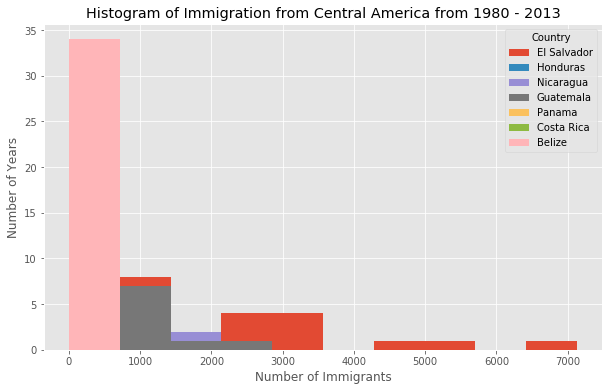

In [20]:
# generate histogram
df_CA.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Central America from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Text(0.5, 0, 'Years')

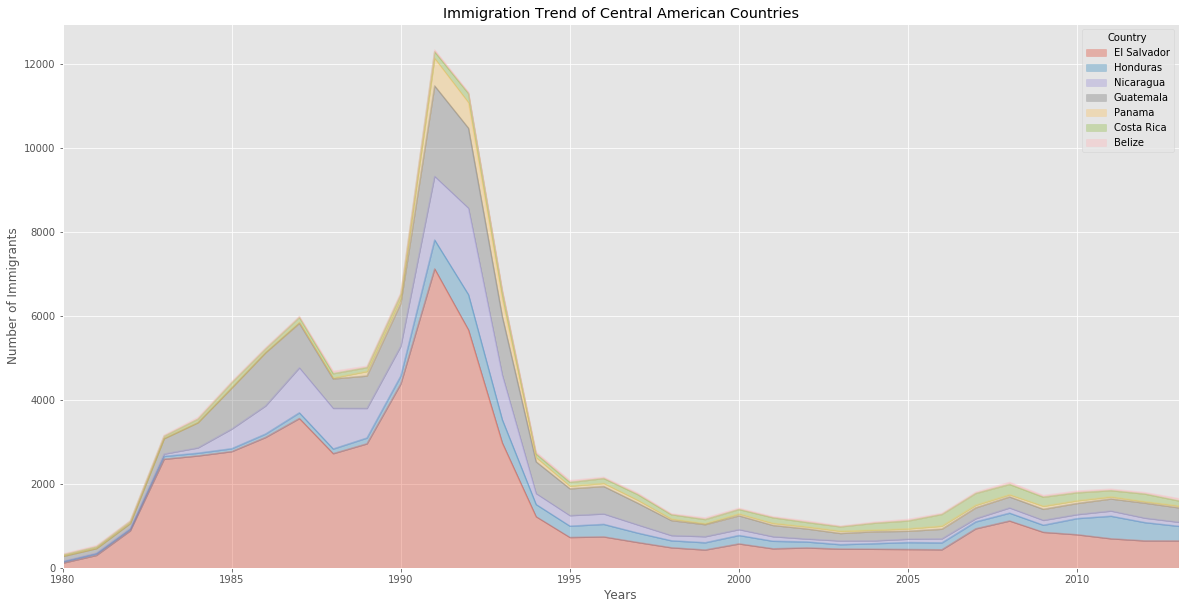

In [21]:
ax = df_CA.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Central American Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

In [22]:
# let's quickly view the dataset 
df_can.loc[['Brazil', 'Colombia', 'Argentina', 'Peru', 'Venezuela (Bolivarian Republic of)', 'Chile', 'Ecuador', 'Bolivia (Plurinational State of)', 'Paraguay', 'Uruguay'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,211,220,192,139,145,130,205,244,394,650,...,917,969,1181,1746,2138,2509,2598,1508,1642,1714
Colombia,266,326,360,244,235,214,257,376,352,439,...,4566,6424,6535,5357,5452,4652,5218,4366,3741,3631
Argentina,368,426,626,241,237,196,213,519,374,538,...,1591,1153,847,620,540,467,459,278,263,282
Peru,317,456,401,241,306,328,628,843,1237,1667,...,1460,1653,1473,1490,1094,1884,1283,886,787,682
Venezuela (Bolivarian Republic of),103,117,174,124,142,165,179,229,279,304,...,1224,1211,1192,1335,1239,1353,998,1452,1373,1022
Chile,1233,1069,1078,781,681,533,633,1454,990,1023,...,383,384,427,530,350,375,340,174,291,273
Ecuador,238,207,184,155,179,208,240,344,265,278,...,417,491,525,419,437,373,353,348,282,418
Bolivia (Plurinational State of),44,52,42,49,38,44,79,165,63,68,...,85,134,139,107,143,214,180,86,83,107
Paraguay,45,26,32,40,48,36,34,72,53,48,...,74,75,88,98,95,88,89,83,55,66


In [23]:
# transpose dataframe
df_SA = df_can.loc[['Brazil', 'Colombia', 'Argentina', 'Peru', 'Venezuela (Bolivarian Republic of)', 'Chile', 'Ecuador', 'Bolivia (Plurinational State of)', 'Paraguay', 'Uruguay'], years].transpose()
df_SA.head()

Country,Brazil,Colombia,Argentina,Peru,Venezuela (Bolivarian Republic of),Chile,Ecuador,Bolivia (Plurinational State of),Paraguay,Uruguay
1980,211,266,368,317,103,1233,238,44,45,128
1981,220,326,426,456,117,1069,207,52,26,132
1982,192,360,626,401,174,1078,184,42,32,146
1983,139,244,241,241,124,781,155,49,40,105
1984,145,235,237,306,142,681,179,38,48,90


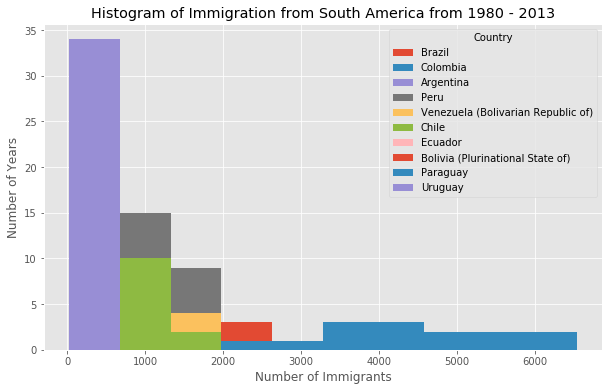

In [24]:
# generate histogram
df_SA.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from South America from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Venezuela Analisis

Text(0.5, 0, 'Years')

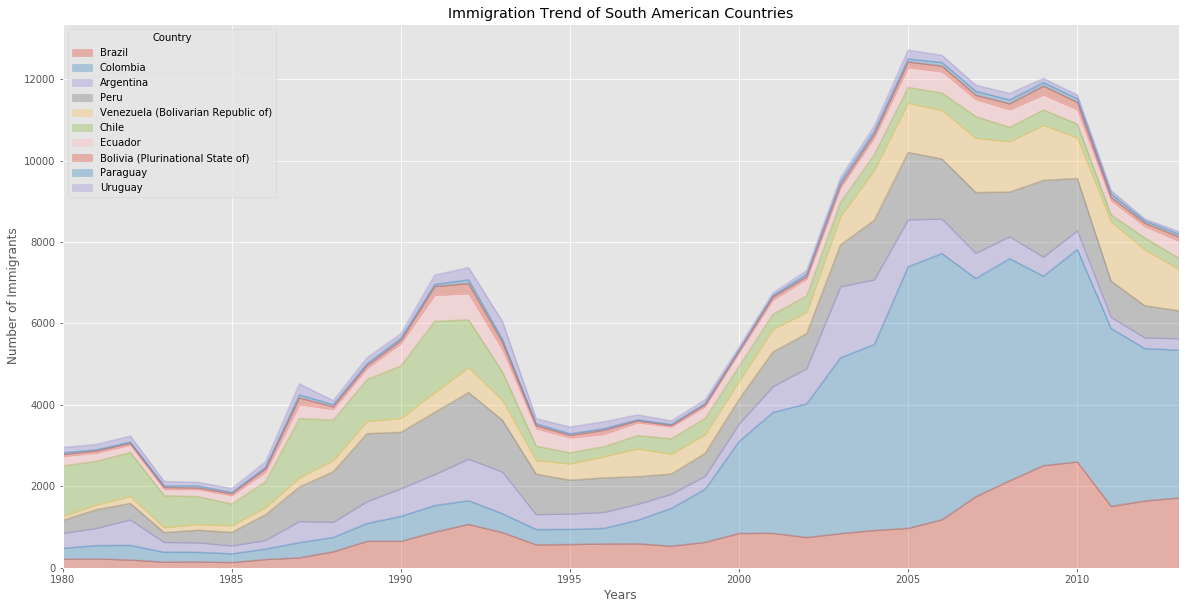

In [25]:
ax = df_SA.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of South American Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

In [26]:
# step 1: get the data
df_VZ = df_can.loc['Venezuela (Bolivarian Republic of)', years]
df_VZ.head()

1980    103
1981    117
1982    174
1983    124
1984    142
Name: Venezuela (Bolivarian Republic of), dtype: object

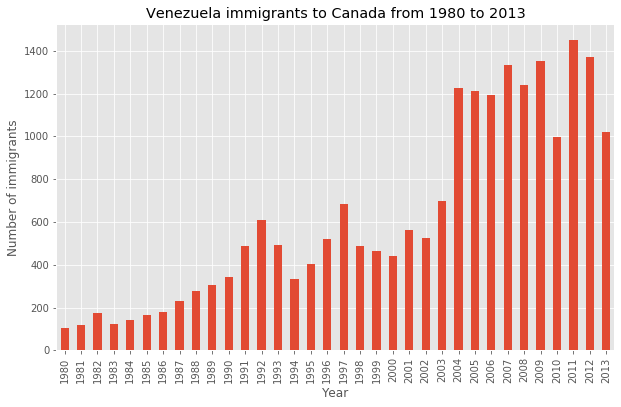

In [27]:
# step 2: plot data
df_VZ.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Venezuela immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

Text(0.5, 0, 'Years')

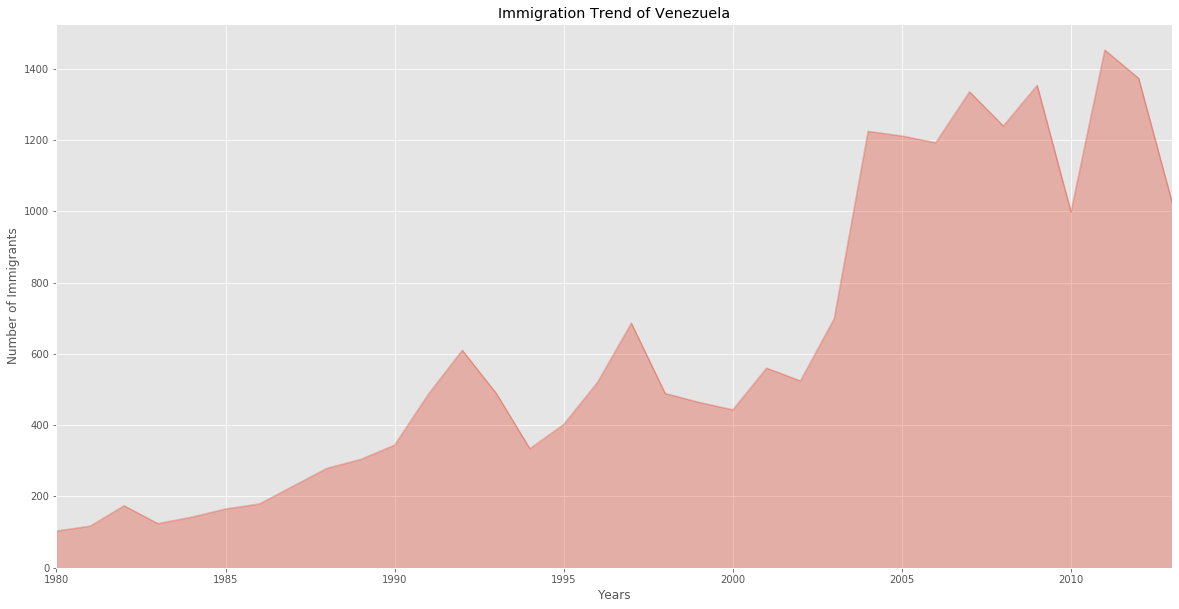

In [28]:
ax = df_VZ.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Venezuela')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

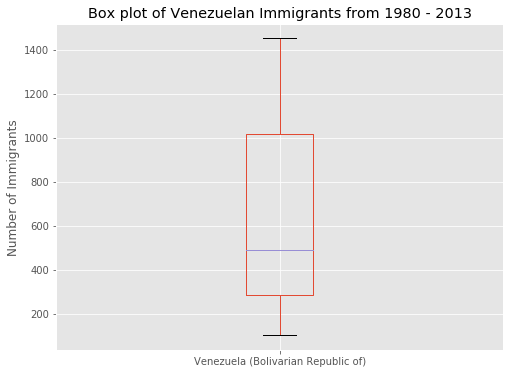

In [29]:
df_VZ.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Venezuelan Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [30]:
df_VZ.describe()

count       34
unique      34
top       1022
freq         1
Name: Venezuela (Bolivarian Republic of), dtype: int64

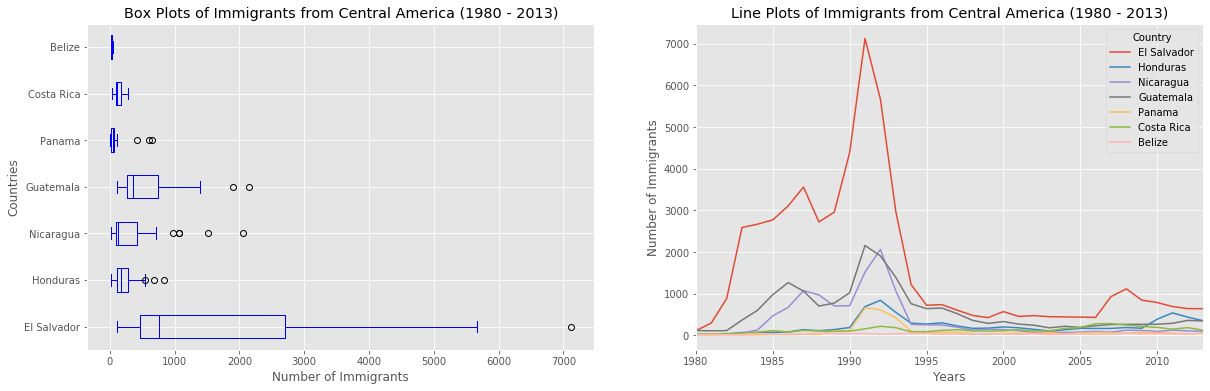

In [31]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CA.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from Central America (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CA.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from Central America (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

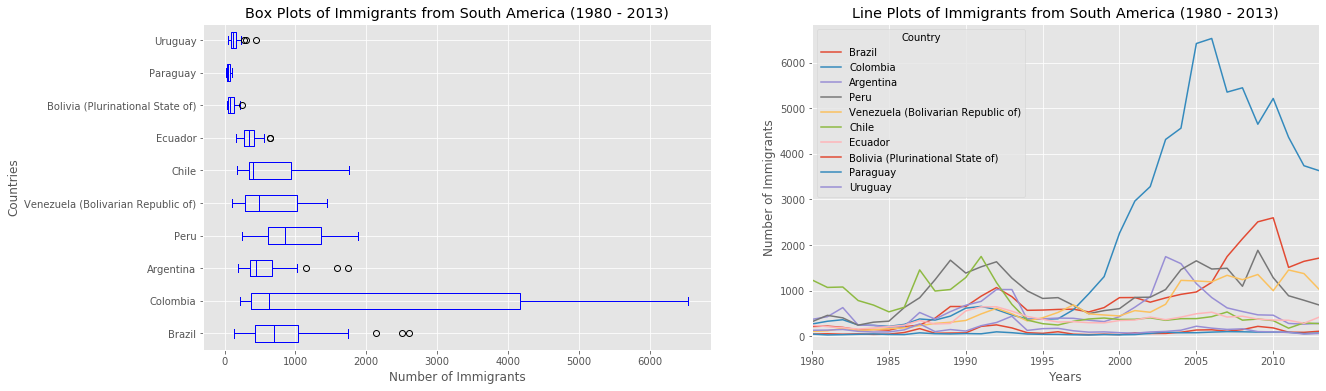

In [32]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_SA.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from South America (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_SA.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from South America (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

Top 15 Countries

In [33]:
# sort dataframe on 'Total' column (descending)
df_can.sort_values(by='Total', ascending=True, inplace=True)

# get top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

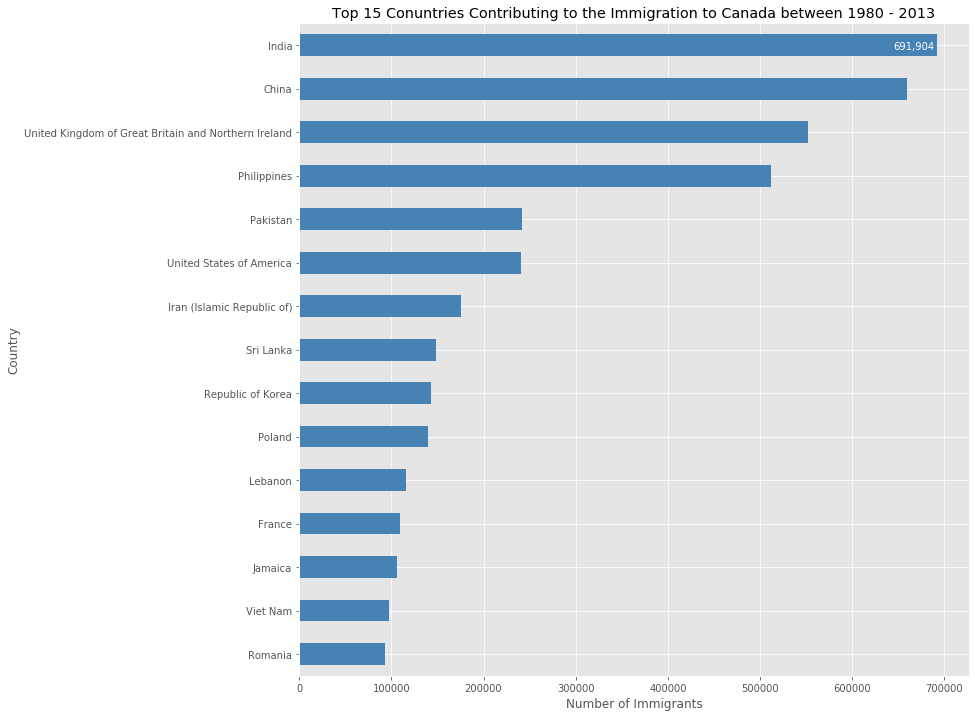

In [34]:
# generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
plt.annotate(label, xy=(value - 47000, index - 0.10), color='white') 


plt.show()

In [35]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


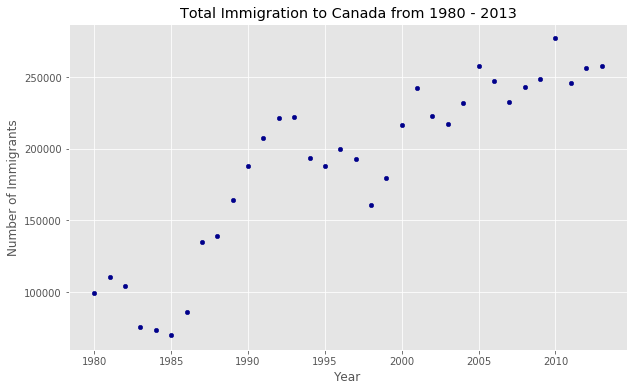

In [36]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [37]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

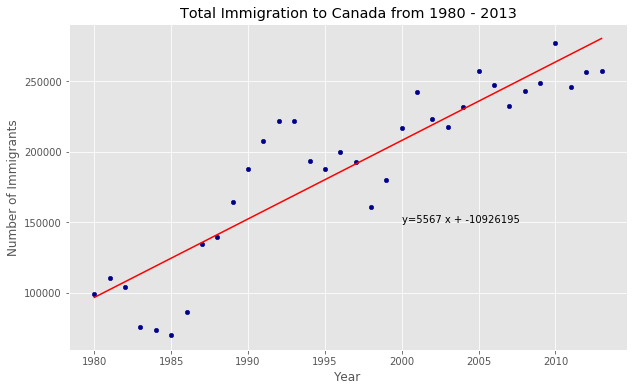

'No. Immigrants = 5567 * Year + -10926195'

In [38]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

In [39]:
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# show resulting dataframe
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


In [40]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


Now that we have the GeoJSON file, let's create a world map, centered around [0, 0] latitude and longitude values, with an intial zoom level of 2, and using Mapbox Bright style.

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.

In [ ]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [ ]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

And now to create a Choropleth map, we will use the choropleth method with the following main parameters:

geo_data, which is the GeoJSON file.
data, which is the dataframe containing the data.
columns, which represents the columns in the dataframe that will be used to create the Choropleth map.
key_on, which is the key or variable in the GeoJSON file that contains the name of the variable of interest. To determine that, you will need to open the GeoJSON file using any text editor and note the name of the key or variable that contains the name of the countries, since the countries are our variable of interest. In this case, name is the key in the GeoJSON file that contains the name of the countries. Note that this key is case_sensitive, so you need to pass exactly as it exists in the GeoJSON file.

In [ ]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

In [ ]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)

# display world map
world_map

In [ ]:
# define the world map centered around Canada with a higher zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=8)

# display world map
world_map

In [ ]:
# define Mexico's geolocation coordinates
mexico_latitude = 23.6345 
mexico_longitude = -102.5528

# define the world map centered around Canada with a higher zoom level
mexico_map = folium.Map(location=[mexico_latitude, mexico_longitude], zoom_start=4)


# display world map
mexico_map

In [ ]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Toner')

# display map
world_map

In [ ]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Terrain')

# display map
world_map

In [ ]:
# Install xlrd module.
!pip install xlrd
print('xlrd installed!!')

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)

print('Data downloaded and read into a dataframe!')

In [ ]:
df_can.head()

In [ ]:
print(df_can.shape)

In [ ]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

In [ ]:
df_can.head()

In [ ]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

In [ ]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

In [ ]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

As per our Choropleth map legend, the darker the color of a country and the closer the color to red, the higher the number of immigrants from that country. Accordingly, the highest immigration over the course of 33 years (from 1980 to 2013) was from China, India, and the Philippines, followed by Poland, Pakistan, and interestingly, the US.

Notice how the legend is displaying a negative boundary or threshold. Let's fix that by defining our own thresholds and starting with 0 instead of -6,918!

In [ ]:
world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map